<a href="https://colab.research.google.com/github/meabhaykr/Coffee-Shop-Sales-Analysis-Using-Python/blob/main/Coffee_Shop_Sales_Analysis_Using_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project Overview**

The **Coffee Shop Sales Analysis Project** replicates an Excel dashboard in Python to provide insights into sales, visitor behavior, and product performance. This project uses Python libraries like `pandas`, `matplotlib`, and `seaborn` for data analysis and visualization. The project is designed to analyze sales data and present actionable insights through interactive charts and metrics.

### Step 1: Install Required Libraries
First, install the necessary Python libraries if you haven't already:
```bash
pip install pandas matplotlib seaborn openpyxl
```

---

In [ ]:
pip install pandas matplotlib seaborn openpyx

ERROR: Could not find a version that satisfies the requirement openpyx (from versions: none)
ERROR: No matching distribution found for openpyx


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the data

In [ ]:
# Load the data
data_file = "/content/drive/MyDrive/AlmaBetter/My Project/Coffee Shop Sales Analysis/Coffee Shop Sales Analysis Using python/Transactions.csv"
data = pd.read_csv(data_file)
data.head()

,transaction_id,transaction_date,transaction_time,store_id,store_location,product_id,transaction_qty,unit_price,product_category,product_type,product_detail,size,amount,month_name,day_name,hour,day_of_week,month
0,114301,01-06-2023,11:33:29,3,Astoria,45,1,3.0,Tea,Brewed herbal tea,Peppermint,Large,3.0,June,Thursday,11,4,6
1,115405,02-06-2023,11:18:24,3,Astoria,45,1,3.0,Tea,Brewed herbal tea,Peppermint,Large,3.0,June,Friday,11,5,6
2,115478,02-06-2023,12:02:45,3,Astoria,45,1,3.0,Tea,Brewed herbal tea,Peppermint,Large,3.0,June,Friday,12,5,6
3,116288,02-06-2023,19:39:47,3,Astoria,45,1,3.0,Tea,Brewed herbal tea,Peppermint,Large,3.0,June,Friday,19,5,6
4,116714,03-06-2023,12:24:57,3,Astoria,45,1,3.0,Tea,Brewed herbal tea,Peppermint,Large,3.0,June,Saturday,12,6,6


### Total Sales

In [ ]:
total_sales = data['amount'].sum()
total_sales

698812.3300000002

### Total Visitors

In [ ]:
total_visitors = data['transaction_id'].nunique()
total_visitors

149116

### Average Bill and Average Orders

In [ ]:
avg_bill = data['amount'].mean()
avg_orders = data['transaction_qty'].mean()
avg_bill, avg_orders

(4.686367190643527, 1.438276241315486)

### Quantity Ordered by Hours

In [ ]:
hourly_sales = data.groupby('hour')['transaction_qty'].sum().reset_index()
hourly_sales

,hour,transaction_qty
0,6,6865
1,7,19449
2,8,25197
3,9,25370
4,10,26713
5,11,14035
6,12,12690
7,13,12439
8,14,12907
9,15,12923


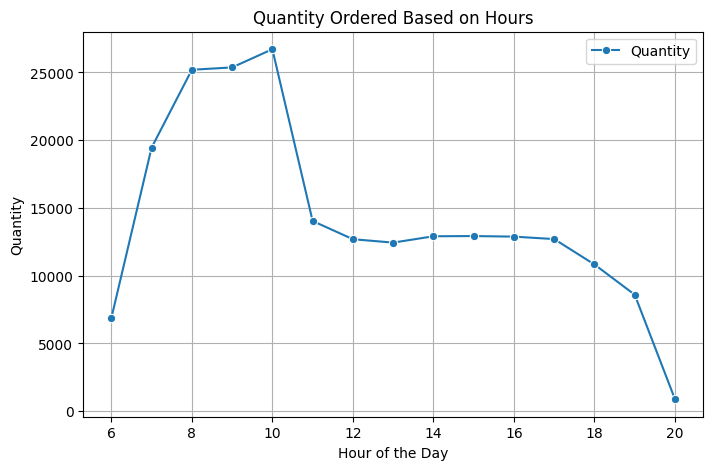

In [ ]:
plt.figure(figsize=(8, 5))
sns.lineplot(x='hour', y='transaction_qty', data=hourly_sales, marker='o', label='Quantity')
plt.title("Quantity Ordered Based on Hours")
plt.xlabel("Hour of the Day")
plt.ylabel("Quantity")
plt.grid(True)
plt.show()

### Footfall Over Store Locations

In [ ]:
store_footfall = data.groupby('store_location').agg(
    Transaction_Count=('transaction_id', 'count'),
    Total_Sales=('amount', 'sum')
).reset_index()
store_footfall

,store_location,Transaction_Count,Total_Sales
0,Astoria,50599,232243.91
1,Hell's Kitchen,50735,236511.17
2,Lower Manhattan,47782,230057.25


<Figure size 800x500 with 0 Axes>

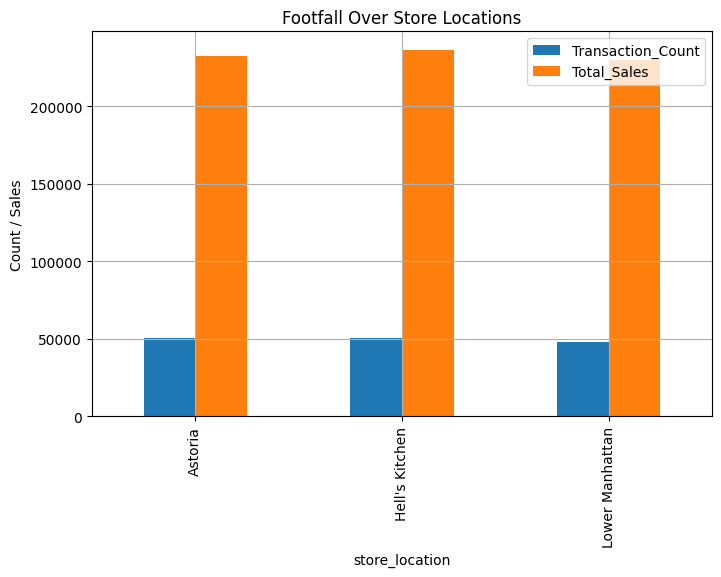

In [ ]:
plt.figure(figsize=(8, 5))
store_footfall.plot(kind='bar', x='store_location', y=['Transaction_Count', 'Total_Sales'], figsize=(8, 5))
plt.title("Footfall Over Store Locations")
plt.ylabel("Count / Sales")
plt.grid(True)
plt.show()

### Size Distribution Based on Orders

In [ ]:
size_distribution = data['size'].value_counts()
size_distribution

,count
size,
Regular,45789
Large,44885
Not defined,44518
Small,13924


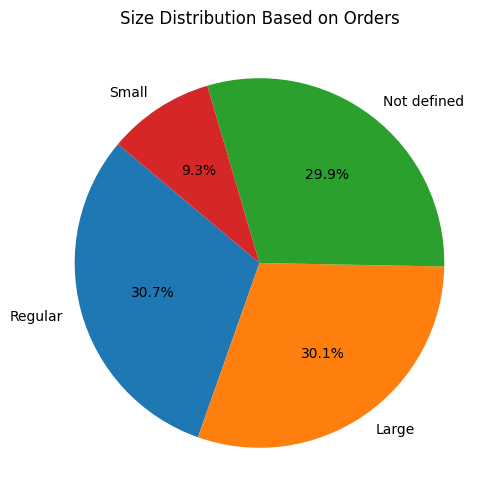

In [ ]:
plt.figure(figsize=(6, 6))
size_distribution.plot(kind='pie', autopct='%1.1f%%', labels=size_distribution.index, startangle=140)
plt.title("Size Distribution Based on Orders")
plt.ylabel("")
plt.show()

### Category Distribution Based on Sales

In [ ]:
category_sales = data.groupby('product_category')['amount'].sum().reset_index()
category_sales

,product_category,amount
0,Bakery,82315.64
1,Branded,13607.00
2,Coffee,269952.45
3,Coffee beans,40085.25
4,Drinking Chocolate,72416.00
5,Flavours,8408.80
6,Loose Tea,11213.60
7,Packaged Chocolate,4407.64
8,Tea,196405.95


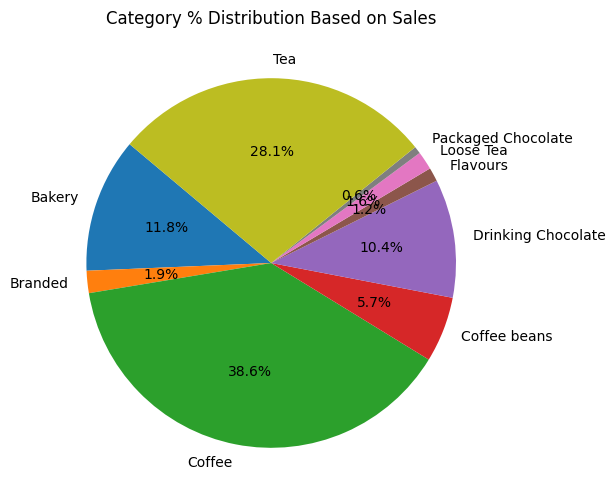

In [ ]:
plt.figure(figsize=(8, 6))
plt.pie(category_sales['amount'], labels=category_sales['product_category'], autopct='%1.1f%%', startangle=140)
plt.title("Category % Distribution Based on Sales")
plt.show()

### Numbers of Sales Based on Weekdays

In [ ]:
weekday_sales = data.groupby('day_name')['transaction_qty'].sum().reset_index()
weekday_sales

,day_name,transaction_qty
0,Friday,31207
1,Monday,31231
2,Saturday,29614
3,Sunday,30182
4,Thursday,31162
5,Tuesday,30449
6,Wednesday,30625


<ipython-input-37-5e61d68f07ab>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day_name', y='transaction_qty', data=weekday_sales, palette='viridis')


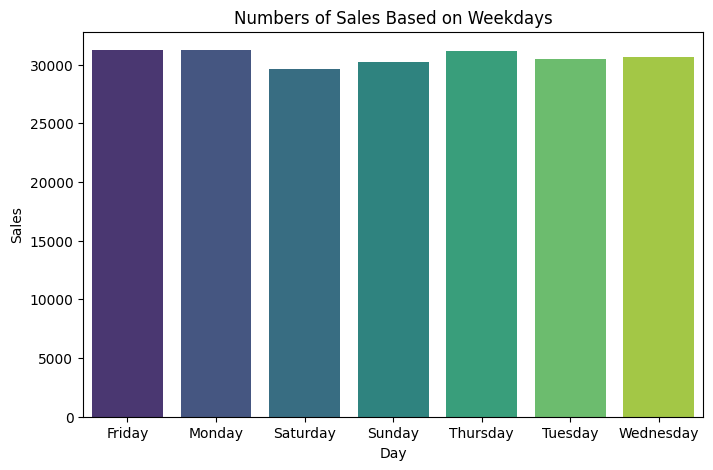

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x='day_name', y='transaction_qty', data=weekday_sales, palette='viridis')
plt.title("Numbers of Sales Based on Weekdays")
plt.xlabel("Day")
plt.ylabel("Sales")
plt.show()

### Top 5 Products Based on Sales

In [ ]:
top_products = data.groupby('product_detail')['amount'].sum().nlargest(5).reset_index()
top_products

,product_detail,amount
0,Ethiopia,42304.10
1,Sustainably Grown Organic,39065.10
2,Jamaican Coffee River,38781.15
3,Brazilian,37746.50
4,Latte,36369.75


<ipython-input-39-096ecb6497d7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='amount', y='product_detail', data=top_products, palette='rocket')


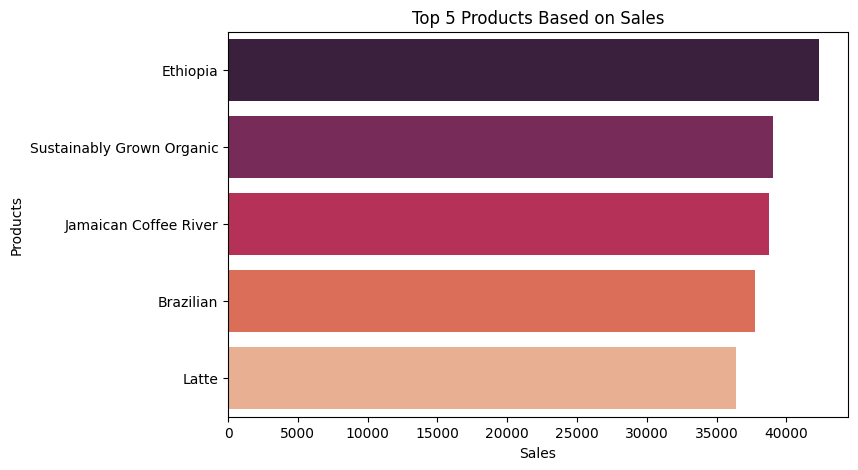

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x='amount', y='product_detail', data=top_products, palette='rocket')
plt.title("Top 5 Products Based on Sales")
plt.xlabel("Sales")
plt.ylabel("Products")
plt.show()

### Key Features in the Code:
1. **Data Analysis**:
   - `groupby` is used to aggregate data (e.g., sum of sales, count of transactions).
   - Extract insights like sales per category, per weekday, or per product.

2. **Visualizations**:
   - Line charts (`sns.lineplot`) for hourly sales.
   - Bar charts (`sns.barplot`) for weekday and product analysis.
   - Pie charts for size and category distributions.

3. **Summary Metrics**:
   - Displaying total sales, total visitors, average bill, and average orders.


### Next Steps:
1. Run the code and verify the outputs.
2. If you have specific questions or need customization (e.g., adding filters or more visuals), let me know!

<ipython-input-40-2f4d7081384b>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[2, 0], x='day_name', y='transaction_qty', data=weekday_sales, palette='viridis')
<ipython-input-40-2f4d7081384b>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[2, 1], x='amount', y='product_detail', data=top_products, palette='rocket')


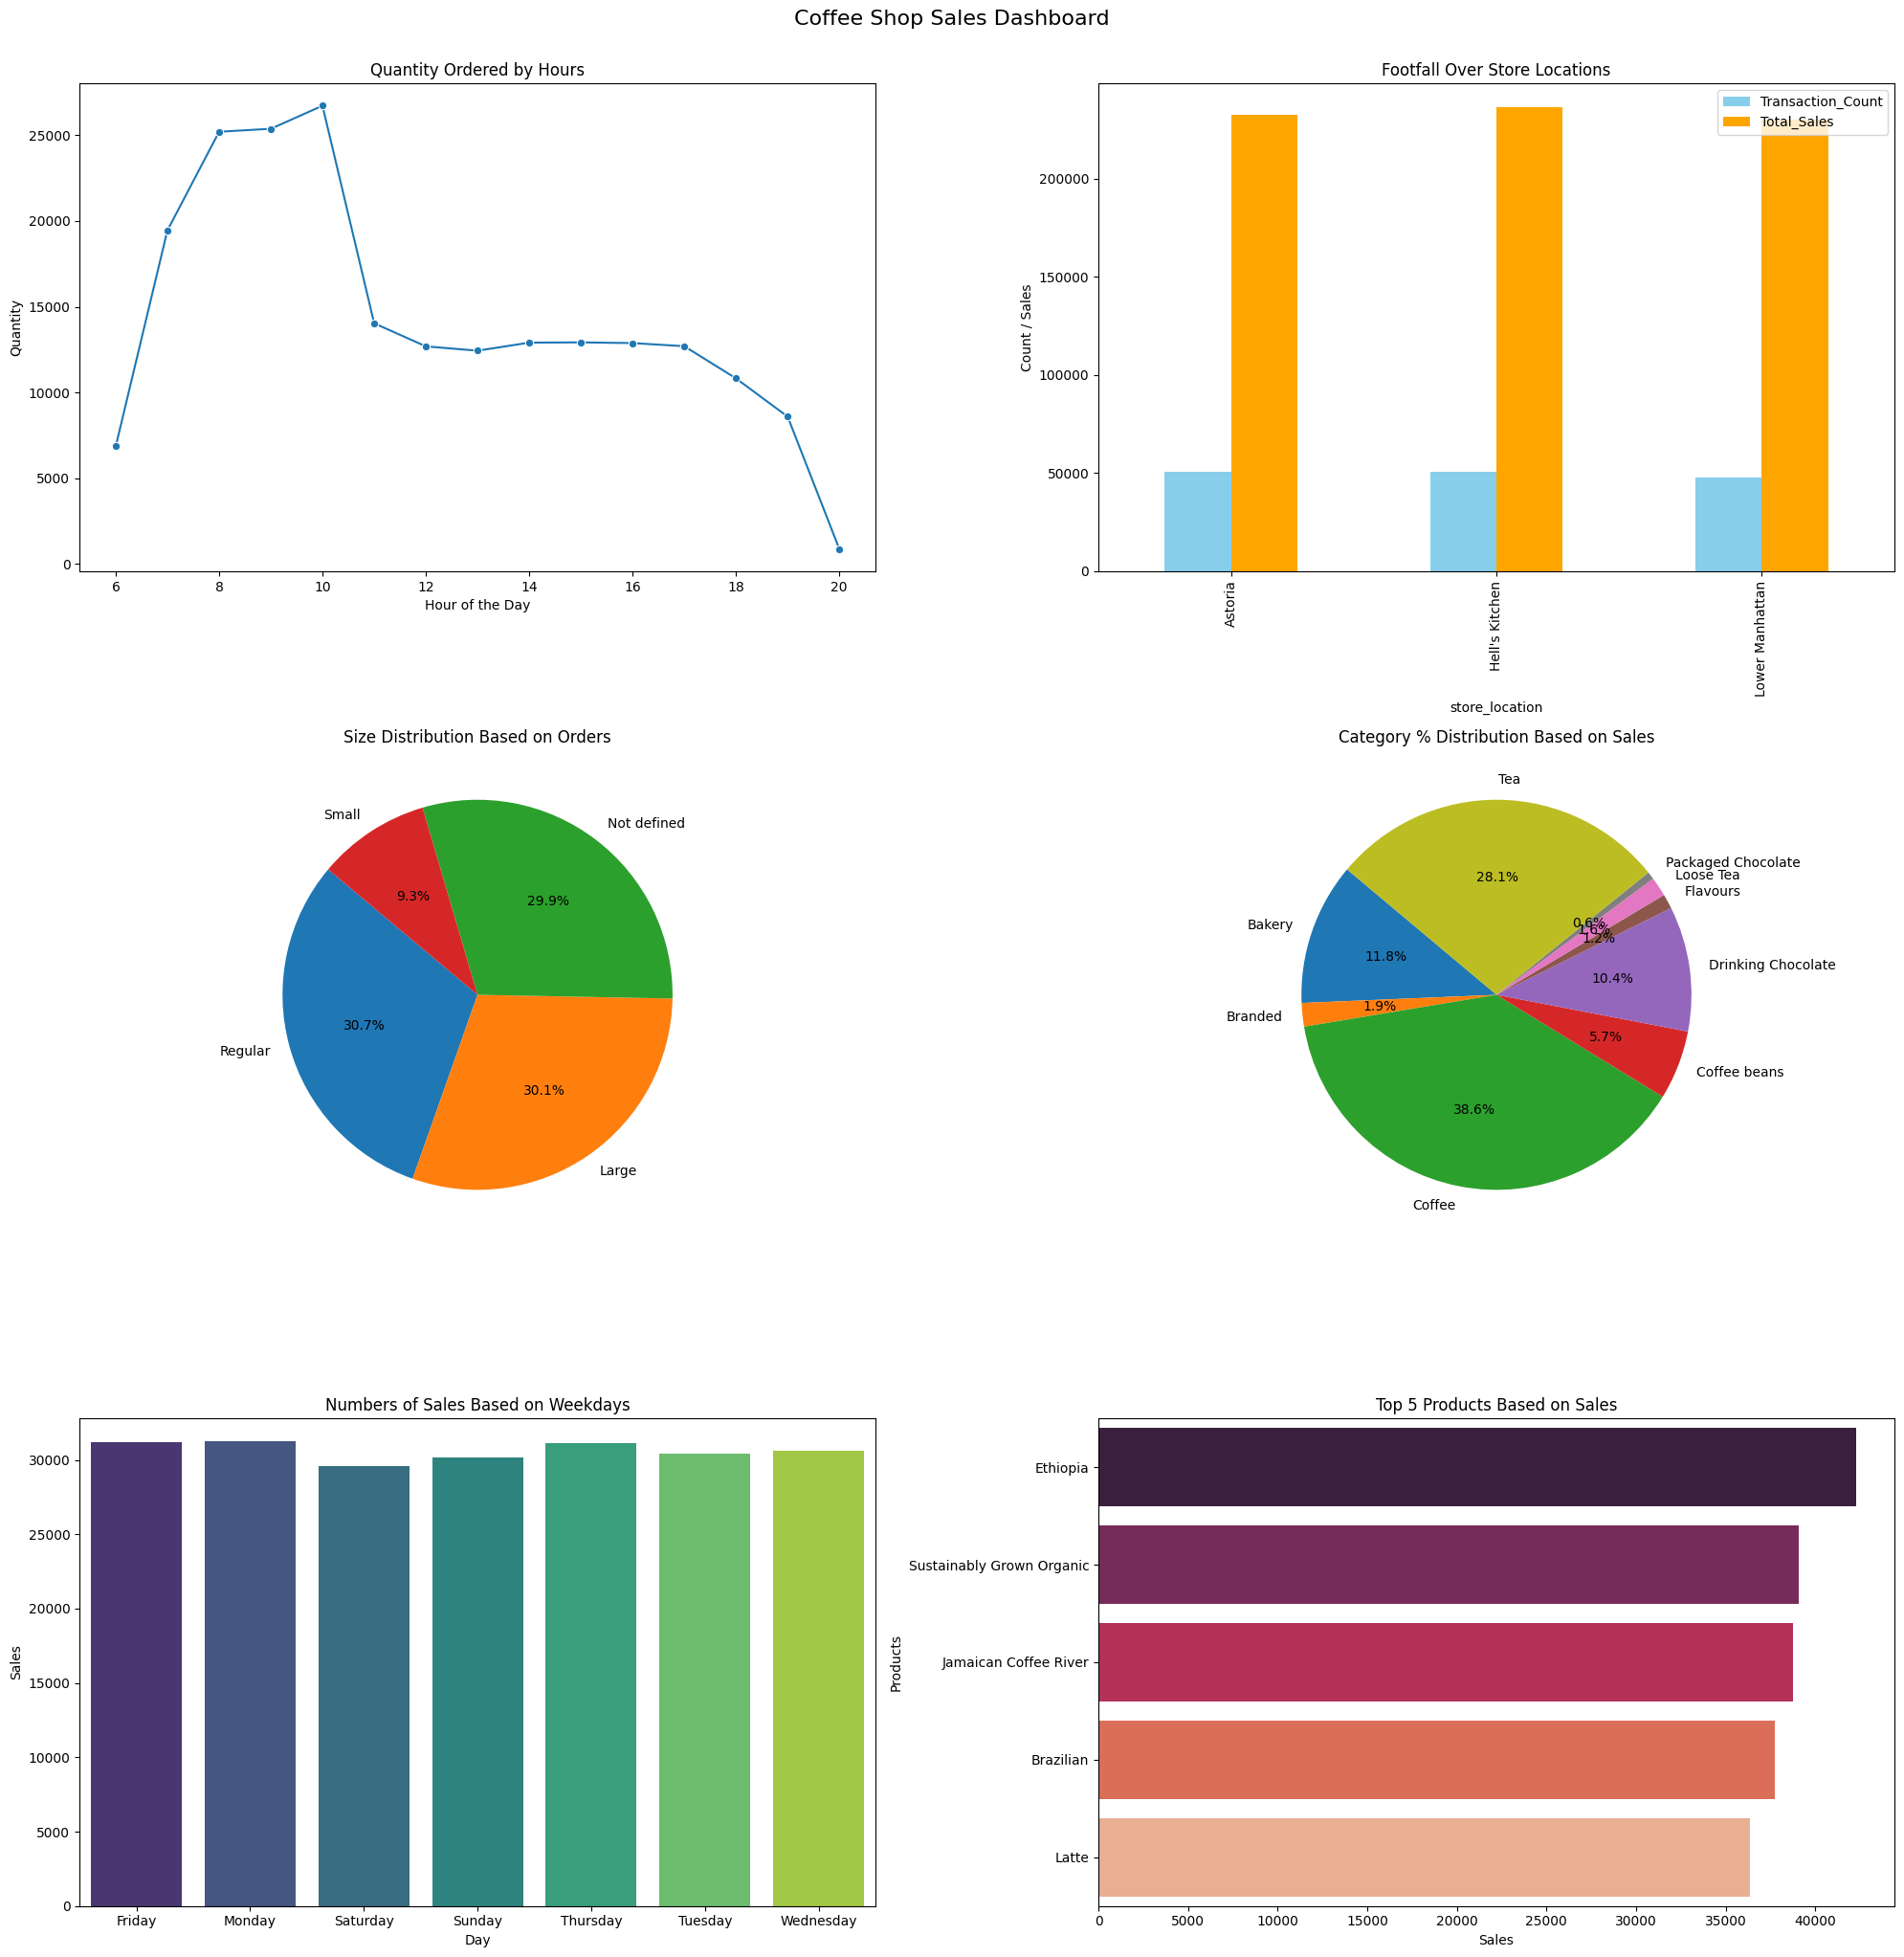

In [ ]:
# 1. Prepare the data
total_sales = data['amount'].sum()
total_visitors = data['transaction_id'].nunique()
avg_bill = data['amount'].mean()
avg_orders = data['transaction_qty'].mean()
hourly_sales = data.groupby('hour')['transaction_qty'].sum().reset_index()
store_footfall = data.groupby('store_location').agg(
    Transaction_Count=('transaction_id', 'count'),
    Total_Sales=('amount', 'sum')
).reset_index()
size_distribution = data['size'].value_counts()
category_sales = data.groupby('product_category')['amount'].sum().reset_index()
weekday_sales = data.groupby('day_name')['transaction_qty'].sum().reset_index()
top_products = data.groupby('product_detail')['amount'].sum().nlargest(5).reset_index()

# 2. Create a figure for all charts
fig, axes = plt.subplots(3, 2, figsize=(20, 20))  # 3 rows, 2 columns

# Chart 1: Quantity Ordered by Hours
sns.lineplot(ax=axes[0, 0], x='hour', y='transaction_qty', data=hourly_sales, marker='o')
axes[0, 0].set_title("Quantity Ordered by Hours")
axes[0, 0].set_xlabel("Hour of the Day")
axes[0, 0].set_ylabel("Quantity")

# Chart 2: Footfall Over Store Locations
store_footfall.plot(kind='bar', x='store_location', y=['Transaction_Count', 'Total_Sales'], ax=axes[0, 1], color=['skyblue', 'orange'])
axes[0, 1].set_title("Footfall Over Store Locations")
axes[0, 1].set_ylabel("Count / Sales")

# Chart 3: Size Distribution Based on Orders
size_distribution.plot(kind='pie', autopct='%1.1f%%', labels=size_distribution.index, startangle=140, ax=axes[1, 0])
axes[1, 0].set_title("Size Distribution Based on Orders")
axes[1, 0].set_ylabel("")

# Chart 4: Category % Distribution Based on Sales
axes[1, 1].pie(category_sales['amount'], labels=category_sales['product_category'], autopct='%1.1f%%', startangle=140)
axes[1, 1].set_title("Category % Distribution Based on Sales")

# Chart 5: Numbers of Sales Based on Weekdays
sns.barplot(ax=axes[2, 0], x='day_name', y='transaction_qty', data=weekday_sales, palette='viridis')
axes[2, 0].set_title("Numbers of Sales Based on Weekdays")
axes[2, 0].set_xlabel("Day")
axes[2, 0].set_ylabel("Sales")

# Chart 6: Top 5 Products Based on Sales
sns.barplot(ax=axes[2, 1], x='amount', y='product_detail', data=top_products, palette='rocket')
axes[2, 1].set_title("Top 5 Products Based on Sales")
axes[2, 1].set_xlabel("Sales")
axes[2, 1].set_ylabel("Products")

# 3. Adjust layout
plt.tight_layout()
plt.suptitle("Coffee Shop Sales Dashboard", fontsize=16, y=1.02)  # Main title
plt.show()